In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
client_data_file = 'E:/Curneu Medtech/Signal Database.xlsx'
client = pd.read_excel(client_data_file)
client.head()

,SUBJECT NUMBER,SUBJECT´S GENERAL INFORMATION,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,TEST INFORMATION,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,GROUP,GENDER,AGE,RIGHT HANDED?,HEALTHY*,GLASSES,SMOKER,MEDICAL TREATMENT,MEDICINE / SUPPLEMENTS,TRANSFER RATE,TEST TYPE,TEST NAME,NUMBER OF EVENTS,EVENT DURATION (ms),SESSION DATA,STEADY-STATE TIME (s),TEST DURATION (s)
1,1,A,MALE,48,NO,YES,YES,NO,YES,YES,128,VISUAL,IMAGE SEARCH,5,250,A001SV1_1.EDF,5,96
2,1,A,MALE,48,NO,YES,YES,NO,YES,YES,128,VISUAL,FIVE BOX 1,20,250,A001SB1_1.EDF,5,71
3,1,A,MALE,50,NO,YES,YES,NO,YES,YES,128,MOTOR IMAGES,HAND SHAKE,6,5000,A001SM1_1.EDF,25,46
4,2,A,MALE,22,YES,YES,NO,NO,NO,NO,128,VISUAL,FIVE BOX 1,20,250,A002SB1_1.EDF,5,67


In [21]:
new_header = client.iloc[0] 
client = client[1:] 
client.columns = new_header

In [22]:
client.head()

,NaN,GROUP,GENDER,AGE,RIGHT HANDED?,HEALTHY*,GLASSES,SMOKER,MEDICAL TREATMENT,MEDICINE / SUPPLEMENTS,TRANSFER RATE,TEST TYPE,TEST NAME,NUMBER OF EVENTS,EVENT DURATION (ms),SESSION DATA,STEADY-STATE TIME (s),TEST DURATION (s)
1,1,A,MALE,48,NO,YES,YES,NO,YES,YES,128,VISUAL,IMAGE SEARCH,5,250,A001SV1_1.EDF,5,96
2,1,A,MALE,48,NO,YES,YES,NO,YES,YES,128,VISUAL,FIVE BOX 1,20,250,A001SB1_1.EDF,5,71
3,1,A,MALE,50,NO,YES,YES,NO,YES,YES,128,MOTOR IMAGES,HAND SHAKE,6,5000,A001SM1_1.EDF,25,46
4,2,A,MALE,22,YES,YES,NO,NO,NO,NO,128,VISUAL,FIVE BOX 1,20,250,A002SB1_1.EDF,5,67
5,2,A,MALE,22,YES,YES,NO,NO,NO,NO,128,VISUAL,FIVE BOX 2,20,250,A002SB2_1.EDF,5,70


In [25]:
copy=client[['GENDER','TEST TYPE','TEST NAME']]
print(copy)

0   GENDER     TEST TYPE     TEST NAME
1     MALE        VISUAL  IMAGE SEARCH
2     MALE        VISUAL    FIVE BOX 1
3     MALE  MOTOR IMAGES    HAND SHAKE
4     MALE        VISUAL    FIVE BOX 1
5     MALE        VISUAL    FIVE BOX 2
..     ...           ...           ...
139    FEM        VISUAL    FIVE BOX 3
140    FEM  MOTOR IMAGES    HAND SHAKE
141    FEM        VISUAL  IMAGE SEARCH
142    NaN           NaN           NaN
143    NaN           NaN           NaN

[143 rows x 3 columns]


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(copy)
model = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
centroids = model.cluster_centers_
print(centroids)

[[0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         0.60534851 0.79596054]]


TypeError: nan is not a string

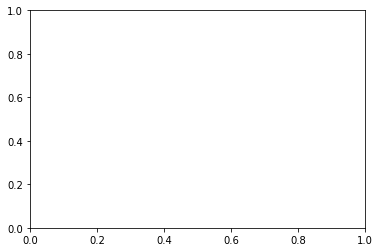

In [43]:
plt.scatter(copy['GENDER'],copy['TEST NAME'], c=model.labels_, cmap='rainbow')